In [45]:
import pandas as pd

In [46]:
s = pd.read_json('../data/input/single_label.json')

In [47]:
s = s[s['doc_title'] == 'Enigma Stealer Targets Cryptocurrency Industry with Fake Jobs']

In [48]:
s = s.drop(columns=['doc_title'])
s

,text,label
1324,use several highly obfuscated and underdevelop...,T1027
1325,malicious RAR archive,T1027
1326,"exploits CVE-2015-2291, an Intel driver vulner...",T1068
1327,deploying a malicious kernel mode driver (“bri...,T1068
1328,install an information stealer.,T1005
...,...,...
1383,collect system information and steals user inf...,T1074.001
1384,"tokens, and passwords from various web browser...",T1078
1385,captures screenshots,T1113
1386,compressed and exfiltrated to the attacker via...,T1041


In [49]:
a = s.label.value_counts()
a

label
T1027        15
T1095         7
T1140         6
T1105         4
T1106         3
T1548.002     3
T1005         2
T1036.005     2
T1204.002     2
T1012         2
T1068         2
T1218.011     2
T1562.001     2
T1074.001     2
T1041         1
T1113         1
T1053.005     1
T1078         1
T1112         1
T1033         1
T1082         1
T1566.001     1
T1056.001     1
T1573.001     1
Name: count, dtype: int64

In [50]:
m = pd.read_csv('./results/tram_predict/bestModel/m/0.9.csv')
ma = pd.read_csv('./results/tram_predict/bestModel/ma/ma0.9.csv')
s = pd.read_csv('./results/tram_predict/bestModel/s/0.9.csv')
sa = pd.read_csv('./results/tram_predict/bestModel/sa/0.9.csv')
#print(m)
#print(ma)
#print(s)
#print(sa)

import numpy as np
import ast

me = m['label(s)'].apply(ast.literal_eval).explode().dropna()
mae = ma['label(s)'].apply(ast.literal_eval).explode().dropna()
se = s['label(s)'].apply(ast.literal_eval).explode().dropna()
sae = sa['label(s)'].apply(ast.literal_eval).explode().dropna()
l = np.concatenate((me.unique(), mae.unique(), se.unique(), sae.unique()))
#print(me)
#print(mae)
#print(se)
#print(sae)
#print(l)
mvc = me.value_counts()
mavc = mae.value_counts()
svc = se.value_counts()
savc = sae.value_counts()
print(mvc)
print(mavc)
print(svc)
print(savc)

KeyError: 'label(s)'

In [ ]:
df = pd.DataFrame({
    'Ground Truth': a,
    'Multi Label': mvc,
    'Multi Label Enriched': mavc,
    'Single Label': svc,
    'Single Label Enriched': savc
})

In [53]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

kepler


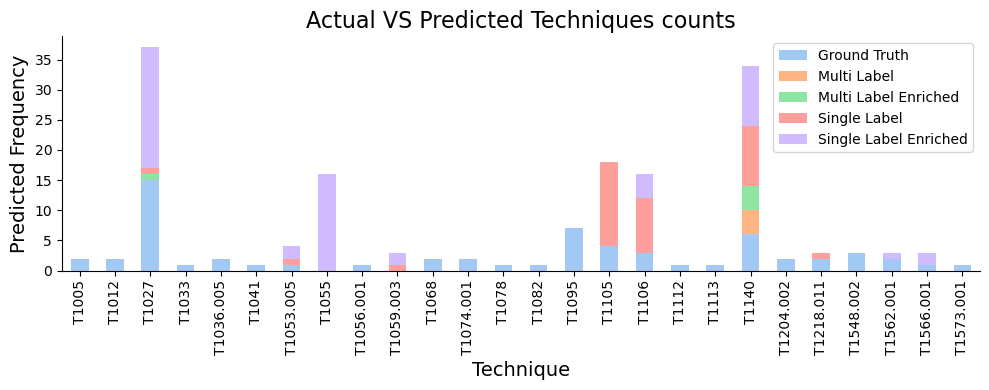

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#ffd1dc', '#d1fffb', '#daffc1', '#f2d1ff', '#ffd1d1']
ax = df.plot(kind='bar', stacked=True, figsize=(10, 4), color=sns.color_palette("pastel").as_hex(),)
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.xlabel('Technique', fontsize=14)
plt.ylabel('Predicted Frequency', fontsize=14)
plt.title('Actual VS Predicted Techniques counts', fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('TechniqueCount.pdf', format='pdf')

# Show the plot
plt.show()


In [5]:
import seaborn as sns
sns.color_palette("pastel").as_hex()

['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#fab0e4',
 '#cfcfcf',
 '#fffea3',
 '#b9f2f0']

In [4]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [6]:
import seaborn as sns

# Get the pastel color palette
pastel_colors = sns.color_palette("pastel")

# Convert the RGB colors to hex
pastel_colors_hex = pastel_colors.as_hex()

# Generate LaTeX \definecolor commands
latex_commands = []
for i, color in enumerate(pastel_colors_hex):
    # Remove the '#' from the color code
    color = color.lstrip('#')
    # Convert the color code to RGB
    r, g, b = tuple(int(color[i:i+2], 16) / 255.0 for i in (0, 2, 4))
    # Generate the \definecolor command
    command = "\\definecolor{{pastel{}}}{{RGB}}{{{},{},{}}}".format(i+1, int(r*255), int(g*255), int(b*255))
    latex_commands.append(command)

# Print the LaTeX commands
for command in latex_commands:
    print(command)

\definecolor{pastel1}{RGB}{161,201,244}
\definecolor{pastel2}{RGB}{255,180,130}
\definecolor{pastel3}{RGB}{141,229,161}
\definecolor{pastel4}{RGB}{255,159,155}
\definecolor{pastel5}{RGB}{208,187,255}
\definecolor{pastel6}{RGB}{222,187,155}
\definecolor{pastel7}{RGB}{250,176,228}
\definecolor{pastel8}{RGB}{207,207,207}
\definecolor{pastel9}{RGB}{255,254,163}
\definecolor{pastel10}{RGB}{185,242,240}
